<a href="https://colab.research.google.com/github/nhatanhcc/THTTNT_BUOI4_NGUYENBUINHATANH/blob/main/BUOI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Đang đọc ma trận từ file...

--- KẾT QUẢ TÔ MÀU ĐỒ THỊ ---
Đỉnh A     = Yellow
Đỉnh B     = Red
Đỉnh C     = Blue
Đỉnh D     = Yellow
Đỉnh E     = Red
Đỉnh F     = Blue

=> Đã sử dụng 3 màu.


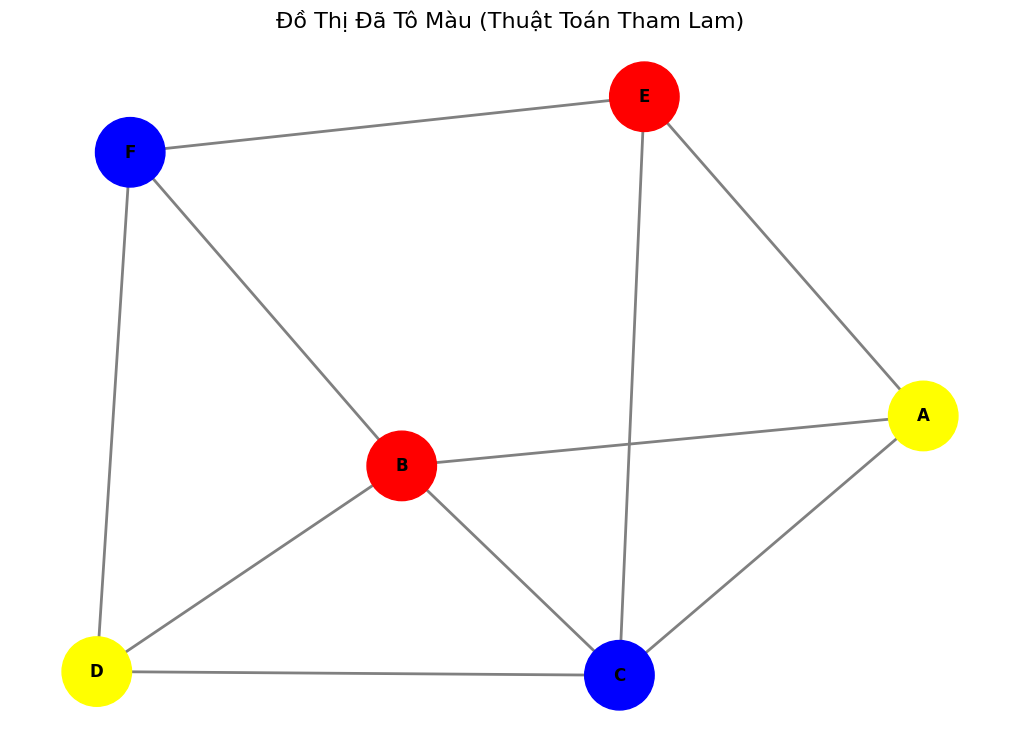

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np




def read_adj_matrix(file_path):
    """Đọc ma trận kề từ tệp tin văn bản."""
    try:

        with open(file_path, 'r') as f:
            lines = f.readlines()

        matrix = []
        for line in lines:
            row = [int(x) for x in line.strip().split()]
            if row:
                matrix.append(row)

        N = len(matrix)
        if not matrix or N != len(matrix[0]):
            raise ValueError("Ma trận không hợp lệ hoặc không phải ma trận vuông.")

        return matrix

    except FileNotFoundError:
        print(f"LỖI: Không tìm thấy tệp tin tại đường dẫn {file_path}")
        print("Vui lòng tải tệp tin này lên môi trường Colab (ở thanh menu bên trái).")
        return None
    except ValueError as e:
        print(f"LỖI DỮ LIỆU: {e}")
        return None


def greedy_graph_coloring(G_matrix):
    """Thực hiện thuật toán tô màu tham lam (sắp xếp theo bậc giảm dần)."""
    N = len(G_matrix)
    node = [chr(65 + i) for i in range(N)]
    t_ = {node[i]: i for i in range(N)}
    degree = [sum(G_matrix[i]) for i in range(N)]


    available_colors = ["Red", "Blue", "Yellow", "Green", "Cyan", "Magenta", "Orange", "Purple"]
    colorDict = {n: available_colors[:] for n in node}


    degree_indexed = [(degree[i], i) for i in range(N)]
    sorted_indices = [idx for deg, idx in sorted(degree_indexed, key=lambda x: x[0], reverse=True)]
    sortedNode = [node[i] for i in sorted_indices]


    theSolution = {}
    for n in sortedNode:

        if not colorDict[n]:
            theSolution[n] = "Black"
            continue
        setTheColor = colorDict[n][0]
        theSolution[n] = setTheColor
        adjacentNode_index = G_matrix[t_[n]]

        for j in range(N):
            if adjacentNode_index[j] == 1 and (setTheColor in colorDict[node[j]]):
                colorDict[node[j]].remove(setTheColor)

    return theSolution, node
def draw_colored_graph(G_matrix, coloring_result, node_names):
    """Vẽ đồ thị và tô màu các đỉnh dựa trên kết quả."""

    G = nx.Graph()
    G.add_nodes_from(node_names)

    N = len(G_matrix)
    for i in range(N):
        for j in range(i + 1, N):
            if G_matrix[i][j] == 1:
                G.add_edge(node_names[i], node_names[j])

    color_map_hex = {
        'Red': '#FF0000', 'Blue': '#0000FF', 'Yellow': '#FFFF00', 'Green': '#008000',
        'Cyan': '#00FFFF', 'Magenta': '#FF00FF', 'Orange': '#FFA500', 'Purple': '#800080',
        'Black': '#000000'
    }


    node_colors = [color_map_hex.get(coloring_result.get(node), '#808080') for node in G.nodes()]

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos,
            with_labels=True,
            node_color=node_colors,
            node_size=2500,
            font_size=12,
            font_color='black',
            font_weight='bold',
            edge_color='gray',
            width=2)

    plt.title("Đồ Thị Đã Tô Màu (Thuật Toán Tham Lam)", size=16)
    plt.show()


FILE_NAME = 'adj_matrix.txt'

sample_matrix_content = """
0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0
"""

with open(FILE_NAME, 'w') as f:
    f.write(sample_matrix_content.strip())


print("Đang đọc ma trận từ file...")
G_matrix = read_adj_matrix(FILE_NAME)

if G_matrix:

    coloring_result, node_names = greedy_graph_coloring(G_matrix)
    print("\n--- KẾT QUẢ TÔ MÀU ĐỒ THỊ ---")


    sorted_results = sorted(coloring_result.items(), key=lambda item: item[0])
    used_colors = set(coloring_result.values())

    for t, w in sorted_results:
        print(f"Đỉnh {t:<5} = {w}")
    print(f"\n=> Đã sử dụng {len(used_colors)} màu.")
    draw_colored_graph(G_matrix, coloring_result, node_names)